## Quantum Energy Teleportation protocol for long distances

### Import packages

In [183]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as sampler
from qiskit.visualization import plot_histogram

## Article proposed circuits 

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [184]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def QET_QST_XX(k,h):
    qr1 = QuantumRegister(4)
    cr1 = ClassicalRegister(4,"alpha")
    qc1 = QuantumCircuit(qr1, cr1)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc1.ry(2*alpha,qr1[0])
    qc1.cx(qr1[0],qr1[1])
    
    # Alice's projective measurement
    qc1.h(qr1[0])

    #Bob's conditional operation
    phi=0.5*np.arcsin(sin(k,h))
    qc1.cry(-2*phi,qr1[0],qr1[1])
    
    qc1.x(qr1[0])
    qc1.cry(2*phi,qr1[0],qr1[1])
    qc1.x(qr1[0])
    
    #Measurement of the interaction XX
    # Comment out qc.h(qr[1]) below for the measurement of Bob's Z term
    qc1.h(qr1[1])
    qc1.measure([1],[1])
    
    # Teleport Quantum State after the measurement 
    #create Bell pair
    qc1.h(qr1[2])
    qc1.cx(qr1[2],qr1[3])
    
    #Bell measurement
    qc1.cx(qr1[1],qr1[2])
    qc1.h(qr1[1])
    
    #Equivalent to conditional operation
    qc1.cx(qr1[2],qr1[3])
    qc1.cz(qr1[1],qr1[3])

    qc1.measure([0,2,3], [0,2,3])
    return qc1

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [185]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def QET_QST_Z(k,h):
    qr1 = QuantumRegister(4)
    cr1 = ClassicalRegister(4,"alpha")
    qc1 = QuantumCircuit(qr1, cr1)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc1.ry(2*alpha,qr1[0])
    qc1.cx(qr1[0],qr1[1])
    
    # Alice's projective measurement
    qc1.h(qr1[0])

    #Bob's conditional operation
    phi=0.5*np.arcsin(sin(k,h))
    qc1.cry(-2*phi,qr1[0],qr1[1])
    
    qc1.x(qr1[0])
    qc1.cry(2*phi,qr1[0],qr1[1])
    qc1.x(qr1[0])

    qc1.measure([1],[1])
    
    # Teleport Quantum State after the measurement 
    #create Bell pair
    qc1.h(qr1[2])
    qc1.cx(qr1[2],qr1[3])
    
    #Bell measurement
    qc1.cx(qr1[1],qr1[2])
    qc1.h(qr1[1])
    
    #Equivalent to conditional operation
    qc1.cx(qr1[2],qr1[3])
    qc1.cz(qr1[1],qr1[3])

    qc1.measure([0,2,3], [0,2,3])
    return qc1

## Modified circuit

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [186]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def qt_XX(k,h):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*alpha,qr[0])
    qc.cx(qr[0],qr[1])

    # Alice's projective measurement
    qc.h(qr[0])

    qc.barrier(label='Preapre Bell pair')

    ## Teleport Activated State
    #create Bell pair
    qc.h(qr[2])
    qc.cx(qr[2],qr[3])

    qc.barrier(label='state teleportation')

    # Prepare state teleportation
    qc.cx(qr[1],qr[2])
    qc.h(qr[1])

    # Condicional operation for state teleportation
    qc.cx(qr[2],qr[3])
    qc.cz(qr[1],qr[3])

    qc.barrier(label='energy extraction')

    # Energy extraction conditional operations on teleported state
    phi=0.5*np.arcsin(sin(k,h))

    qc.cry(-2*phi,qr[0],qr[3])

    qc.x(qr[0])
    qc.cry(2*phi,qr[0],qr[3])
    qc.x(qr[0])

    # Measurements
    qc.h(qr[3])
    qc.measure_all()

    return qc

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [187]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def qt_Z(k,h):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*alpha,qr[0])
    qc.cx(qr[0],qr[1])

    # Alice's projective measurement
    qc.h(qr[0])

    qc.barrier(label='Preapre Bell pair')

    ## Teleport Activated State
    #create Bell pair
    qc.h(qr[2])
    qc.cx(qr[2],qr[3])

    qc.barrier(label='state teleportation')

    # Prepare state teleportation
    qc.cx(qr[1],qr[2])
    qc.h(qr[1])

    # Condicional operation for state teleportation
    qc.cx(qr[2],qr[3])
    qc.cz(qr[1],qr[3])

    qc.barrier(label='energy extraction')

    # Energy extraction conditional operations on teleported state
    phi=0.5*np.arcsin(sin(k,h))

    qc.cry(-2*phi,qr[0],qr[3])

    qc.x(qr[0])
    qc.cry(2*phi,qr[0],qr[3])
    qc.x(qr[0])

    # Measurements
    qc.measure_all()

    return qc

## Original circuit vs Modified circuit

In [188]:
# Initiate simulator
simulator = AerSimulator()

# Parameters
h = 1; k = 1;
n_shots = 100000

# Generate circuit
qc1 = QET_QST_Z(h, k)
qcA = transpile(qc1, simulator, optimization_level=3)

qc2 = QET_QST_XX(h, k)
qcB = transpile(qc2, simulator, optimization_level=3)

qc3= qt_Z(h, k)
qcC = transpile(qc3, simulator, optimization_level=3)

qc4= qt_XX(h, k)
qcD = transpile(qc4, simulator, optimization_level=3)

# Run job with Sampler
jobA= sampler().run([qcA], shots=n_shots)
jobB= sampler().run([qcB], shots=n_shots)
jobC= sampler().run([qcC], shots=n_shots)
jobD= sampler().run([qcD], shots=n_shots)


H_B = 0.26178678118654747 ± 0.0028314132471258936


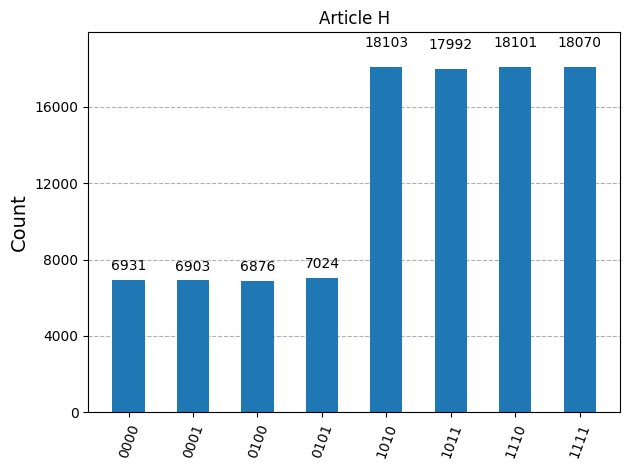

In [189]:
# Extract results
result = jobA.result()[0]
counts = result.data.alpha.get_counts()

# Energys
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_B += h*(-1)**int(bit_string[3])*count/n_shots
        ene_A += h*(-1)**int(bit_string[0])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))

plot_histogram(counts, title="Article H")

H_B = 0.2611067811865474 ± 0.002830342735429757


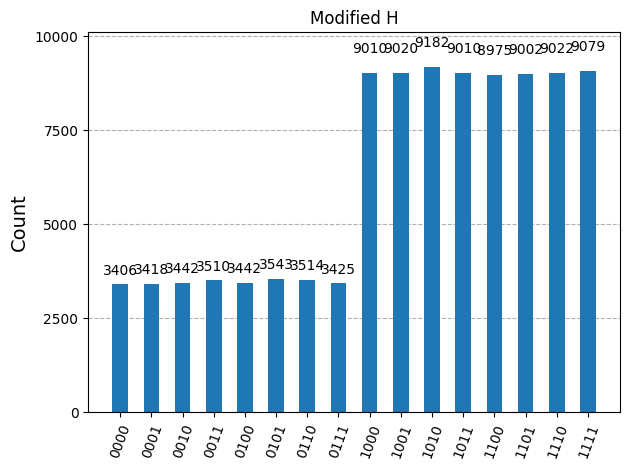

In [190]:
# Extract results
result = jobC.result()[0]
counts = result.data.meas.get_counts()

# Energys
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_B += h*(-1)**int(bit_string[3])*count/n_shots
        ene_A += h*(-1)**int(bit_string[0])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))

plot_histogram(counts, title="Modified H")

V = -0.37714643762690503 ± 0.0028125244006052645


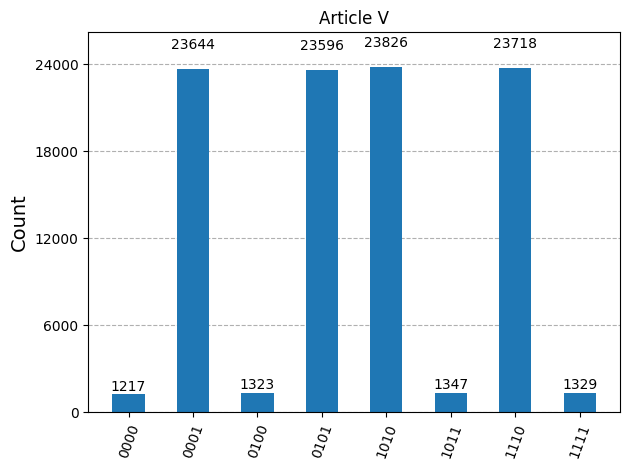

In [191]:
# Extract results
result = jobB.result()[0]
counts = result.data.alpha.get_counts()

ene_XX=(2*k**2)/(np.sqrt(h**2+k**2))

error_XX=[]

for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_XX += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_XX.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

print("V =",ene_XX,"±", np.std(error_XX)/np.sqrt(n_shots))

plot_histogram(counts, title="Article V")

V = -0.3753064376269051 ± 0.002824213465019951


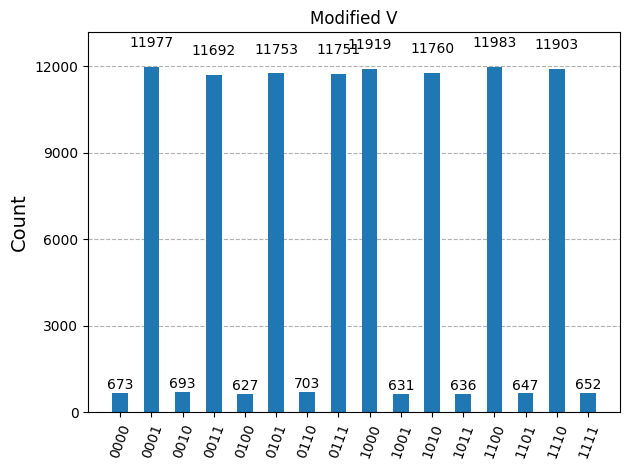

In [192]:
# Extract results
result = jobD.result()[0]
counts = result.data.meas.get_counts()

ene_XX=(2*k**2)/(np.sqrt(h**2+k**2))

error_XX=[]

for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_XX += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_XX.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

print("V =",ene_XX,"±", np.std(error_XX)/np.sqrt(n_shots))

plot_histogram(counts, title="Modified V")

### Execute modified model in IBM hardware

In [204]:
# Import IBM packages
from qiskit_ibm_runtime import Batch, SamplerV2 as sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerOptions

# Select quantum hardware
service = QiskitRuntimeService()
backend = service.backend('ibm_brisbane')

h = 1; k = 1;

qc5 = qt_Z(h, k)
qcE = transpile(qc5, backend=backend, optimization_level=3)

qc6 = qt_XX(h, k)
qcF = transpile(qc6, backend=backend, optimization_level=3)

# Run jobs
with Batch(backend=backend):
    n_shots = 5000
    options = SamplerOptions()
    options.dynamical_decoupling.enable = True
    options.dynamical_decoupling.sequence_type = "XY4"

# Run circuit H
    jobE = sampler().run([(qcE)], shots=n_shots)
    print("Circuit H","ID =",jobE.job_id(), "h =",h, "k =",k)

# Run circuit V
    jobF = sampler().run([(qcF)], shots=n_shots)
    print("Circuit V","ID =",jobF.job_id(), "h =",h, "k =",k)

Circuit H ID = d00mk74qnmvg008wg1s0 h = 1 k = 1
Circuit V ID = d00mk8nd8drg008j99bg h = 1 k = 1


### Results

H_B = 0.31790678118654736 ± 0.0130270745756674


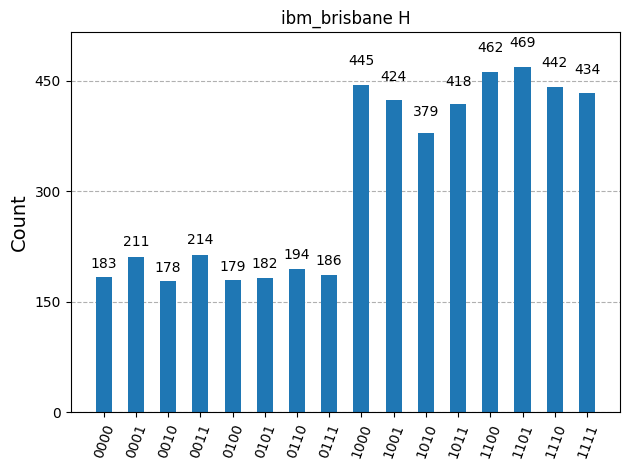

In [205]:
# Extract results
jobE = service.job('d00mk74qnmvg008wg1s0') 
result = jobE.result()[0]
counts = result.data.meas.get_counts()

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_B += h*(-1)**int(bit_string[3])*count/n_shots
        ene_A += h*(-1)**int(bit_string[0])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))

plot_histogram(counts, title=f"{backend.name} H")

V = 0.5630135623730951 ± 0.02559475946360895


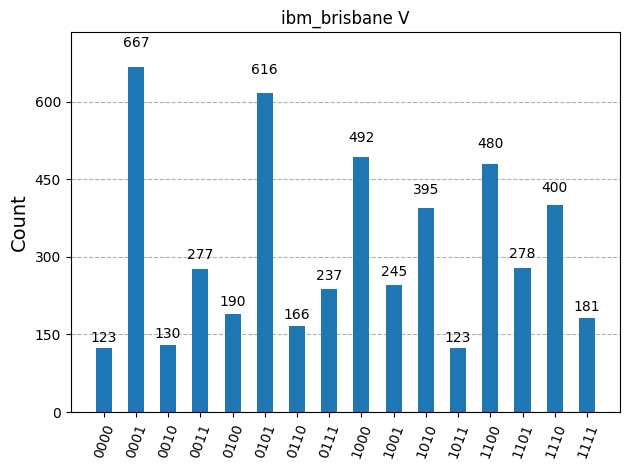

In [206]:
# Extract results
jobF = service.job('d00mk8nd8drg008j99bg')
result = jobF.result()[0]
counts = result.data.meas.get_counts()

# Energies
ene_XX=(2*k**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_XX=[]

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_XX += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_XX.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

# Print results
print("V =",ene_XX,"±", np.std(error_XX)/np.sqrt(n_shots))

plot_histogram(counts, title=f"{backend.name} V")

### Show Transpiled circuit (see qubit mapping)

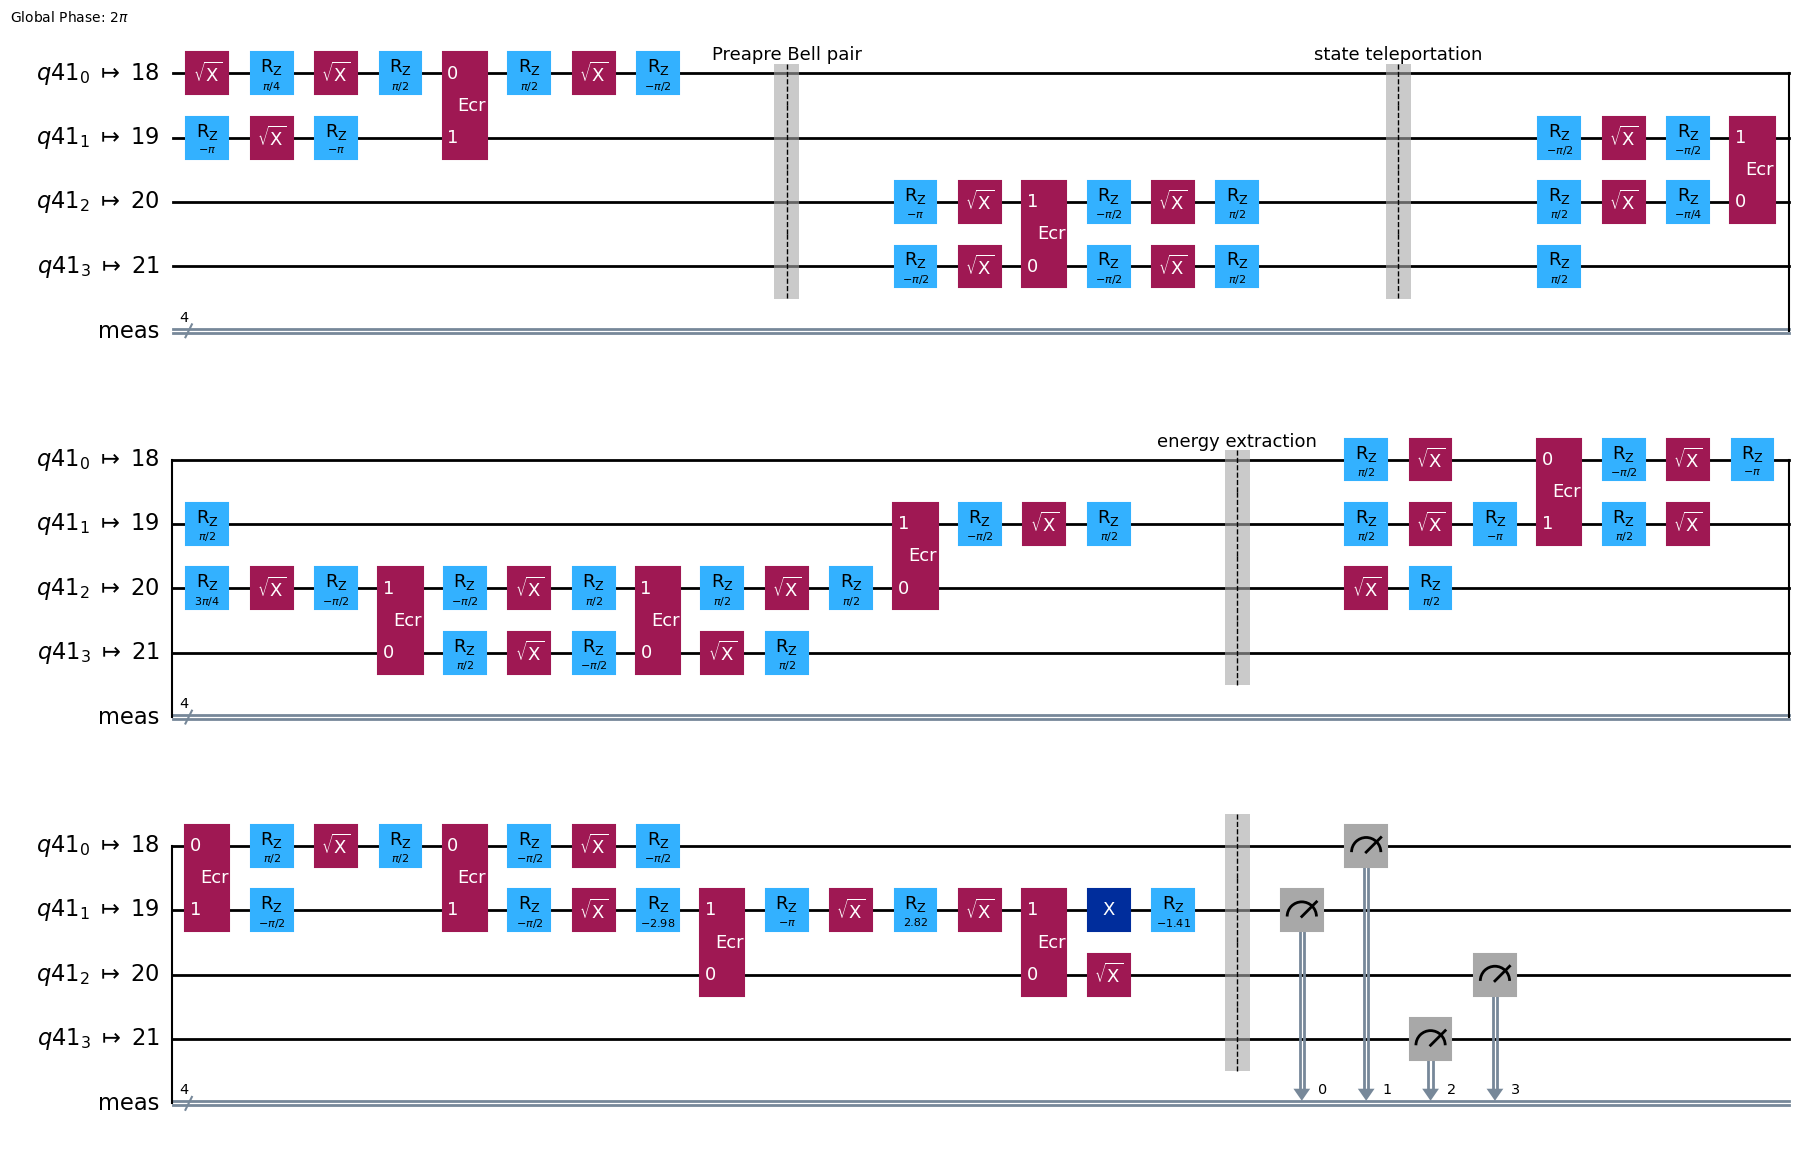

In [207]:
job = service.job('d00mk8nd8drg008j99bg')
pubs = job.inputs['pubs'] 
circuits = [pub[0] for pub in pubs]
circuits[0].draw('mpl')